# Impact of PWV on atmospheric transmission in thermal part in transmittance
==============================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 January 2020
- last update : 2023 November 7th

==============================================================================


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
import time
from datetime import datetime,date
import dateutil.parser

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
 from libradtranpy import libsimulateThermal

In [9]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [10]:
am=1.
pressure = 0.
pwv=4.0
aer=0
ozone=300.
cloudext=0

In [11]:
pwvs=np.linspace(0.2,13.,10)

In [12]:
NBOBS=len(pwvs)

In [13]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [14]:
all_temp = []
for index in np.arange(NBOBS):

    path,thefile=libsimulateThermal.ProcessSimulation(am,pwvs[index],ozone,pressure,
                                                                       prof_str='us',proc_str='sa',cloudext=cloudext,thermal_output='transmittance')
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_temp.append(atm)

In [15]:
wl1=wl

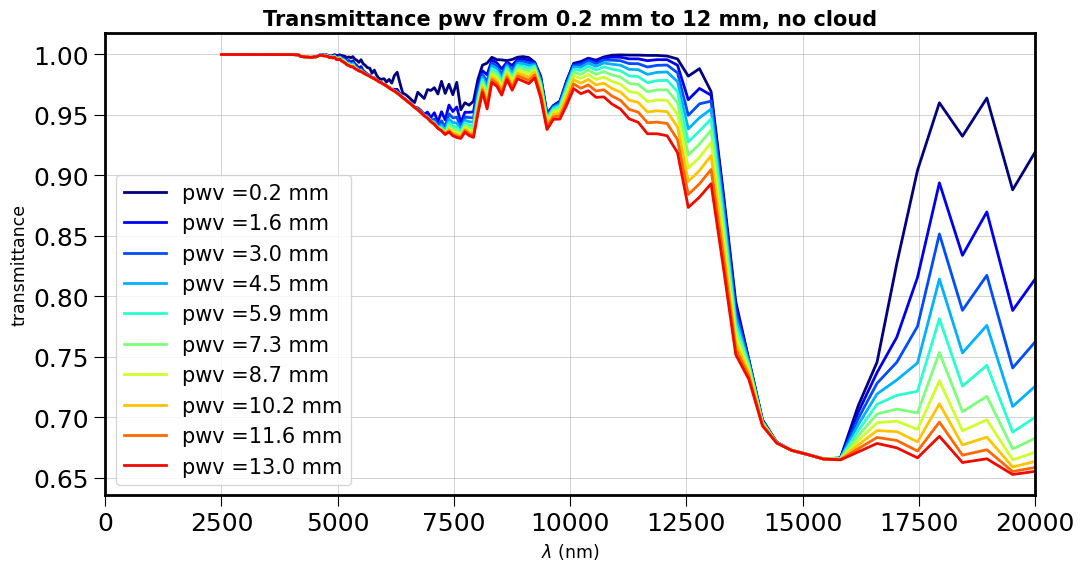

In [17]:
for index,pwv in enumerate(pwvs): 
    label = f"pwv ={pwv:.1f} mm"
    plt.plot(wl1,1-all_temp[index],'-',color=all_colors[index],label=label)

plt.xlim(0,20000)
plt.grid()
plt.title("Transmittance pwv from 0.2 mm to 12 mm, no cloud")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmittance")
plt.legend()
figname=string_date+"_multittransmittance_pwv_cld0.png"    

plt.savefig(figname)